<a href="https://colab.research.google.com/github/dasnomp/Project-1-R7020E/blob/main/ObjectDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics roboflow
import ultralytics
from roboflow import Roboflow
import os
ultralytics.checks()
rf = Roboflow(api_key="Ctgl3HHmuJuXANwCo7i9")
project = rf.workspace("fire-extinguisher").project("fireextinguisher-z5atr")
version = project.version(2)
dataset = version.download("yolov11")

Ultralytics 8.3.213 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")  # pretrained weights

model.train(
    data="FireExtinguisher-2/data.yaml",
    epochs=20,
    imgsz=640,
    resume=False
)

Ultralytics 8.3.213 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=FireExtinguisher-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x794785ece1b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")
metrics = model.val()  # evaluates on the validation set in your data.yaml

Ultralytics 8.3.213 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 851.2±332.6 MB/s, size: 20.0 KB)
val: Scanning /content/FireExtinguisher-2/valid/labels.cache... 328 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 328/328 693.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 4.2it/s 5.0s
                   all        328        606      0.885      0.825      0.908      0.729
Speed: 0.8ms preprocess, 3.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/val2


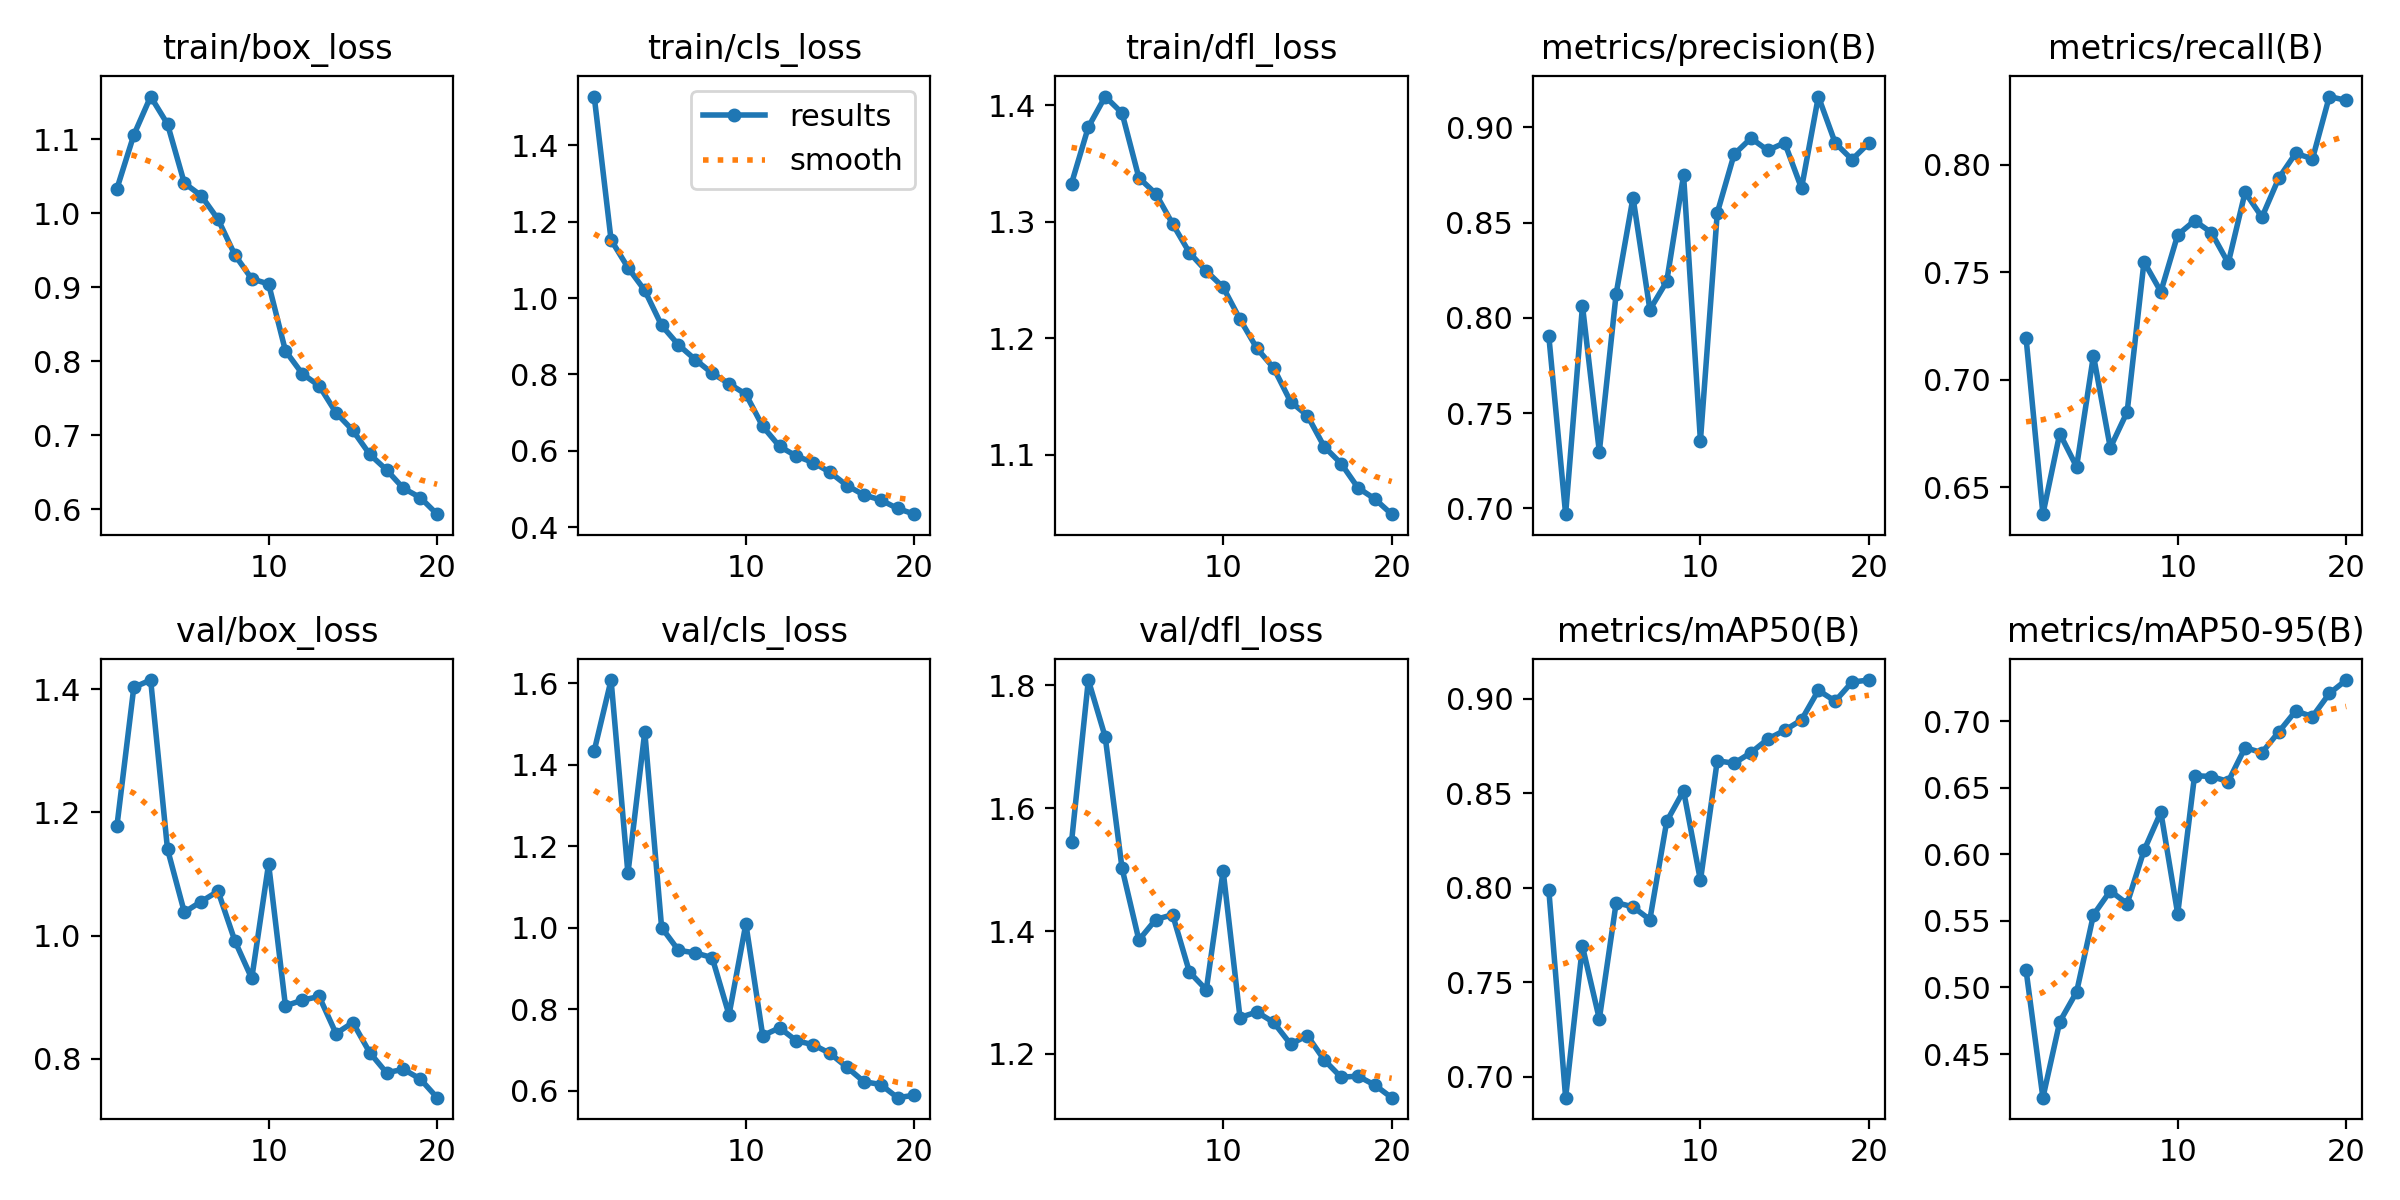

In [ ]:
from IPython.display import display, Image

display(Image(filename='/content/runs/detect/train/results.png'))

In [ ]:
from google.colab import drive
import os, shutil

# 1️⃣ Montera Drive
drive.mount('/content/drive')

# 2️⃣ Basfolder i Drive
base_dir = "/content/drive/MyDrive/Colab Notebooks/yolo_sessions"
os.makedirs(base_dir, exist_ok=True)

# 3️⃣ Hitta nästa sessionsnummer
existing = [d for d in os.listdir(base_dir) if d.startswith("Session_")]
nums = [int(d.split("_")[1]) for d in existing if d.split("_")[1].isdigit()]
next_num = max(nums, default=0) + 1
session_dir = os.path.join(base_dir, f"Session_{next_num}")
os.makedirs(session_dir, exist_ok=True)

# 4️⃣ Källfiler från din senaste YOLO-run
src_dir = "runs/detect/train"  # byt om din run heter train2/train3
targets = [
    "weights/best.pt",
    "weights/last.pt",
    "results.png",
    "confusion_matrix.png"
]

# 5️⃣ Kopiera
for rel_path in targets:
    full_src = os.path.join(src_dir, rel_path)
    if os.path.exists(full_src):
        shutil.copy(full_src, session_dir)
        print(f"✅ Sparade {rel_path}")
    else:
        print(f"⚠️ Hittade inte {rel_path} — hoppar över.")

print(f"\n📂 Sparat i: {session_dir}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Sparade weights/best.pt
✅ Sparade weights/last.pt
✅ Sparade results.png
✅ Sparade confusion_matrix.png

📂 Sparat i: /content/drive/MyDrive/Colab Notebooks/yolo_sessions/Session_1
